In [ ]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import math

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data
from torch.utils.data import Dataset
from torchvision import transforms as T

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

from google.colab import drive
drive.mount('/content/drive')

Using cpu device
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.0 PyTorch

## Problem 1.1: Basics of Autograd

a.

In [ ]:
"""
Taylor approximation to sin(x). 
x: (float) Input value
n: (int) Number of terms in Taylor approximation
"""
def sin_taylor(x, n=10):
  result = 0.0
  for i in range(n):
    term = ((-1.0) ** (i)) * (x ** (2 * i + 1)) / np.math.factorial(2 * i + 1)
    result += term
  return result # Replace with your code for 1.1a.

# Your code here for 1.1b-d goes here

b.

In [ ]:
x = torch.tensor([math.pi/4], requires_grad=True)

y = sin_taylor(x,n=10)
y.backward()

print(x.grad)

tensor([0.7071])


c.

In [ ]:
x_npy = np.random.uniform(-math.pi, math.pi, 100)

x = torch.tensor(x_npy, dtype=torch.float32, requires_grad=True)
x = x.to(device)

y = sin_taylor(x)

z = y.sum().backward()
# print(x.grad[0])

d.

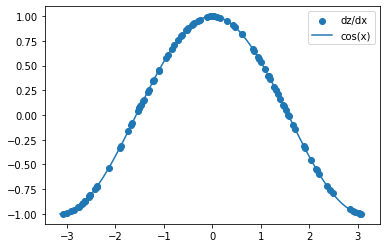

In [ ]:
# z = y.sum().backward()
# z.backward()

dz_dx_npy = x.grad.cpu().numpy()

x_cos_npy = np.linspace(-math.pi, math.pi, 100)

cos_npy = np.cos(x_cos_npy)

plt.scatter(x_npy, dz_dx_npy, label='dz/dx')
plt.plot(x_cos_npy, cos_npy, label='cos(x)')
plt.legend()
plt.show()

In [ ]:
plt.savefig('plot.png')

<Figure size 432x288 with 0 Axes>

## Problem 1.2: Image Denoising

In [ ]:
"""
Returns the x and y gradient images for input image I. 
Input:
I: (Tensor) Image of shape (H, W, 3)

Output:
(Ix, Iy): (Tensor) Gradient images each of shape (H, W, 3)
"""
def get_spatial_gradients(I):
  I = I.permute(2, 0, 1).unsqueeze(0) # Change I's shape from (H, W, 3) to (1, 3, H, W)
  kx = torch.zeros(I.shape[1], I.shape[1], 3, 3).to(I.device)
  ky = torch.zeros(I.shape[1], I.shape[1], 3, 3).to(I.device)

  for i in range(3):
    kx[i, i, 1, 1] = -1
    kx[i, i, 1, 2] = 1
    ky[i, i, 1, 1] = -1
    ky[i, i, 2, 1] = 1

  Ix = F.conv2d(I, kx, padding=1)
  Iy = F.conv2d(I, ky, padding=1)
  return Ix[0,...].permute(1,2,0), Iy[0,...].permute(1,2,0)

"""
Denoising objective function.
Input:
I, J: (Tensor) Images of shape (H, W, 3)
alpha: (float) Regularization hyperparameter

Output:
loss: (float)
"""
def denoising_loss(I, J, alpha):
  Jx, Jy = get_spatial_gradients(J)
  res = torch.norm((I - J), dim=2) + alpha * (torch.norm(Jx, dim=2) + torch.norm(Jy, dim=2))
  return res # Replace with your code for 1.2a.

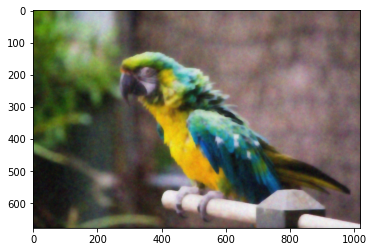

In [ ]:
img = imageio.imread('parrot_noisy.png')/255.0
I = torch.tensor(img, dtype=torch.float32)
I = I.to(device)

lr = 1.0 # Learning rate
alpha = 2.0 # alpha
n_iter = 1500 # Number of iterations


J = I.clone()

J.requires_grad_(True)

for i in range(n_iter):
  # Your code for 1.2b goes here

  loss = denoising_loss(I, J, alpha)

  loss.sum().backward()


  with torch.no_grad():
    
    J -= lr * F.normalize(J.grad, p=2, dim=1)

  J.grad.zero_()

J = J.detach().cpu().numpy()

plt.imshow(J)

<ipython-input-198-76d540e264bb>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('parrot_noisy.png')/255.0


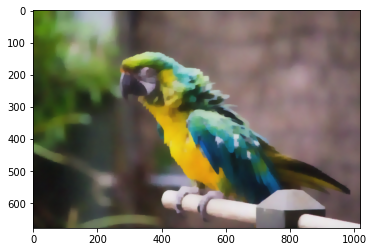

In [ ]:
img = imageio.imread('parrot_noisy.png')/255.0
I = torch.tensor(img, dtype=torch.float32)
I = I.to(device)

lr = 0.1 # Learning rate
alpha = 2.0 # alpha
n_iter = 500 # Number of iterations


J = I.clone()

J.requires_grad_(True)

for i in range(n_iter):
  # Your code for 1.2b goes here

  loss = denoising_loss(I, J, alpha)

  loss.sum().backward()


  with torch.no_grad():
    
    J -= lr * F.normalize(J.grad, p=2, dim=1)

  J.grad.zero_()

J = J.detach().cpu().numpy()

plt.imshow(J)

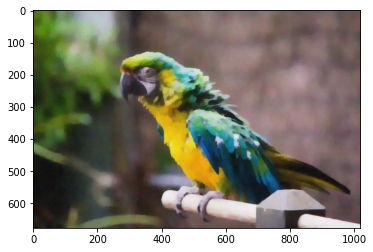

In [ ]:
img = imageio.imread('parrot_noisy.png')/255.0
I = torch.tensor(img, dtype=torch.float32)
I = I.to(device)

lr = 0.1 # Learning rate
alpha = 1.0 # alpha
n_iter = 500 # Number of iterations


J = I.clone()

J.requires_grad_(True)

for i in range(n_iter):
  # Your code for 1.2b goes here

  loss = denoising_loss(I, J, alpha)

  loss.sum().backward()


  with torch.no_grad():
    
    J -= lr * F.normalize(J.grad, p=2, dim=1)

  J.grad.zero_()

J = J.detach().cpu().numpy()

plt.imshow(J)

<ipython-input-212-54a0daeee279>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('parrot_noisy.png')/255.0


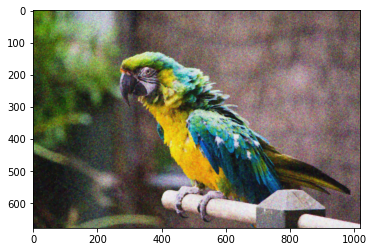

In [ ]:
img = imageio.imread('parrot_noisy.png')/255.0
I = torch.tensor(img, dtype=torch.float32)
I = I.to(device)

lr = 0.01 # Learning rate
alpha = 1.0 # alpha
n_iter = 500 # Number of iterations


J = I.clone()

J.requires_grad_(True)

for i in range(n_iter):
  # Your code for 1.2b goes here

  loss = denoising_loss(I, J, alpha)

  loss.sum().backward()


  with torch.no_grad():
    
    J -= lr * F.normalize(J.grad, p=2, dim=1)

  J.grad.zero_()

J = J.detach().cpu().numpy()

plt.imshow(J)

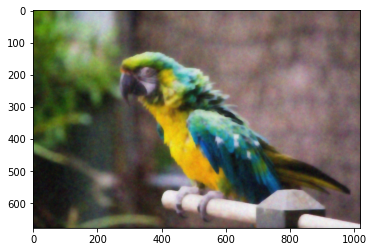

In [ ]:
def denoising_loss(I, J, alpha):
  Jx, Jy = get_spatial_gradients(J)
  res = torch.norm((I - J), dim=2, p=2) + alpha * (torch.norm(Jx, dim=2, p=2) + torch.norm(Jy, dim=2, p=2))
  return res # Replace with your code for 1.2a.

img = imageio.imread('parrot_noisy.png')/255.0
I = torch.tensor(img, dtype=torch.float32)
I = I.to(device)

lr = 1.0 # Learning rate
alpha = 2.0 # alpha
n_iter = 1500 # Number of iterations


J = I.clone()

J.requires_grad_(True)

for i in range(n_iter):
  # Your code for 1.2b goes here

  loss = denoising_loss(I, J, alpha)

  loss.sum().backward()


  with torch.no_grad():
    
    J -= lr * F.normalize(J.grad, p=2, dim=1)

  J.grad.zero_()

J = J.detach().cpu().numpy()

plt.imshow(J)

#2.0 Training an Image Classifier

2a: Finish implementing dataset class

In [ ]:
class CIFARDataset(Dataset):
  def __init__(self, images, labels, mode, transform):
    self.transform = transform

    if mode == 'train':
      self.images = images[:40000]
      self.labels = labels[:40000] 

    elif mode == 'val':
      self.images = images[40000:50000]
      self.labels = labels[40000:50000]
       
    elif mode == 'test':
      self.images = images[50000:60000]
      self.labels = labels[50000:60000]
      
    else:
      raise ValueError('Invalid mode!')

  def __getitem__(self, idx):
    image = self.images[idx]
    label = self.labels[idx]

    label = torch.tensor(label, dtype=torch.long)    


    if self.transform is not None:
      image = self.transform(image)

    return image, label

    # Do the following:
    # 1. Get the image and label from the dataset corresponding to index idx.
    # 2. Convert the label to a LongTensor (needs to be of this type because it 
    # is an integer value and PyTorch will throw an error otherwise)
    # 3. Transform the image using self.transform. This will convert the image 
    # into a tensor, scale it to [0,1], and apply data augmentations.
    # 4. Return the image and label.   

  def __len__(self):
    return len(self.images) 

2b: Write transforms

In [ ]:
cifar = np.load('/content/drive/MyDrive/CIFAR.npz')
X,y,label_names = cifar['X'], cifar['y']*1.0, cifar['label_names']
print("Read in CIFAR10 dataset with %d examples, and labels:\n %s" % (X.shape[0], label_names))

batch_size = 64

transform = []
transform.append(T.ToTensor())
transform.append(T.RandomHorizontalFlip(p=0.5))
transform.append(T.RandomAffine((-5, 5), scale=(0.8, 1.2))) 
transform.append(T.ColorJitter(brightness=[0.8, 1.2], saturation = [0.8, 1.2]))
transform = T.Compose(transform) # Add transforms.

train_dataset = CIFARDataset(X, y, "train", transform)
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)

transform = []
transform.append(T.ToTensor())
transform.append(T.RandomHorizontalFlip(p=0.5))
transform.append(T.RandomAffine((-5, 5), scale=(0.8, 1.2))) 
transform.append(T.ColorJitter(brightness=[0.8, 1.2], saturation = [0.8, 1.2]))
transform = T.Compose(transform) # No augmentations, but should still include ToTensor().

val_dataset = CIFARDataset(X, y, "val", transform)
val_dataloader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=1)

transform = []
transform.append(T.ToTensor())
transform.append(T.RandomHorizontalFlip(p=0.5))
transform.append(T.RandomAffine((-5, 5), scale=(0.8, 1.2))) 
transform.append(T.ColorJitter(brightness=[0.8, 1.2], saturation = [0.8, 1.2]))
transform = T.Compose(transform) # No augmentations, but should still include ToTensor().

test_dataset = CIFARDataset(X, y, "test", transform)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=1)

Read in CIFAR10 dataset with 60000 examples, and labels:
 ['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


2c: Implement the model

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.main1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=50, kernel_size=3, stride=1, padding=1, dilation=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=50, out_channels=100, kernel_size=3, stride=1, padding=1, dilation=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=100, out_channels=100, kernel_size=3, stride=1, padding=1, dilation=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=100, out_channels=100, kernel_size=3, stride=1, padding=1, dilation=1),
        nn.ReLU()
    )
    self.main2 = nn.Sequential(
        nn.Linear(in_features=1600, out_features=100),
        nn.ReLU(),
        nn.Linear(in_features=100, out_features=10)
    )
    
  def forward(self, x):
    x = self.main1(x)
    x = x.reshape(x.shape[0],-1)
    x = self.main2(x)
    return x 

model = Model()
model.to(device)

Model(
  (main1): Sequential(
    (0): Conv2d(3, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(50, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
  )
  (main2): Sequential(
    (0): Linear(in_features=1600, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

2d/2e: Implement the training loop, and train your model.

In [ ]:
batch_size = 64
learning_rate = 1e-4
epochs = 15

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
  model.train()
  for batch, (X,y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      print(epoch, batch, loss.item())

  # model.eval()
  # for batch, (X,y) in enumerate(val_loader):
  #   print(epoch, val_loss.item())

  torch.save(model.state_dict(), 'model_%d.params' % epoch)


  # torch.save({
  #     'epoch': epoch,
  #     'model_state_dict': model.state_dict(),
  #     'optimizer_state_dict': optimizer.state_dict(),
  #     'loss': loss,
  # },'checkpoints.pt')

# Your code here. Don't forget to call model.train() before training!

<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


0 0 2.300647497177124
0 100 2.2412517070770264
0 200 1.9462233781814575
0 300 1.8283905982971191
0 400 2.0464437007904053
0 500 1.8350809812545776
0 600 1.6747218370437622


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1 0 1.7070928812026978
1 100 1.6606024503707886
1 200 1.678910732269287
1 300 1.707371711730957
1 400 1.777036190032959
1 500 1.8539209365844727
1 600 1.6892281770706177


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


2 0 1.659340500831604
2 100 1.7423678636550903
2 200 1.4762578010559082
2 300 1.4245740175247192
2 400 1.581063151359558
2 500 1.5411977767944336
2 600 1.674680471420288


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


3 0 1.5186328887939453
3 100 1.5218747854232788
3 200 1.5321989059448242
3 300 1.4853063821792603
3 400 1.4428657293319702
3 500 1.5886284112930298
3 600 1.4232357740402222


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


4 0 1.2388880252838135
4 100 1.4371858835220337
4 200 1.372822642326355
4 300 1.5762563943862915
4 400 1.3153929710388184
4 500 1.6336479187011719
4 600 1.3630495071411133


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


5 0 1.6309359073638916
5 100 1.621793270111084
5 200 1.356481909751892
5 300 1.2882180213928223
5 400 1.2951592206954956
5 500 1.3702448606491089
5 600 1.5461254119873047


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


6 0 1.41603684425354
6 100 1.3859809637069702
6 200 1.3253583908081055
6 300 1.3374049663543701
6 400 1.3536598682403564
6 500 1.1804816722869873
6 600 1.4049396514892578


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


7 0 1.5465481281280518
7 100 1.2493253946304321
7 200 1.3588732481002808
7 300 1.4663445949554443
7 400 1.369466781616211
7 500 1.0590500831604004
7 600 1.3448522090911865


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


8 0 1.0814772844314575
8 100 1.253130555152893
8 200 1.2758771181106567
8 300 1.345306396484375
8 400 1.4486583471298218
8 500 1.2270865440368652
8 600 1.3609410524368286


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


9 0 1.3802896738052368
9 100 1.3246276378631592
9 200 1.287771224975586
9 300 0.9947782754898071
9 400 1.0255823135375977
9 500 1.2565160989761353
9 600 1.2002028226852417


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


10 0 0.9453880190849304
10 100 1.5837280750274658
10 200 1.192047119140625
10 300 1.0696381330490112
10 400 1.2481013536453247
10 500 1.1216598749160767
10 600 1.0941606760025024


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


11 0 1.07076096534729
11 100 1.314703345298767
11 200 1.2879117727279663
11 300 1.498596429824829
11 400 1.1486384868621826
11 500 1.2678276300430298
11 600 1.0289015769958496


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


12 0 0.9428885579109192
12 100 1.4135361909866333
12 200 1.0676774978637695
12 300 1.3184814453125
12 400 1.296875238418579
12 500 1.2567119598388672
12 600 1.2359497547149658


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


13 0 1.3544094562530518
13 100 1.1767464876174927
13 200 1.1683518886566162
13 300 1.2850338220596313
13 400 1.150484323501587
13 500 1.1370787620544434
13 600 1.128623366355896


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


14 0 1.421554446220398
14 100 1.1545801162719727
14 200 0.933397114276886
14 300 1.2305426597595215
14 400 1.0894616842269897
14 500 1.0758674144744873
14 600 1.1342289447784424


2f: Choose the best model based on overall accuracy 
using the validation dataset.

In [ ]:
model = Model()
model.to(device)

ep_num = np.arange(1,16)
val_loss = np.array([])

for epoch in range(epochs):
  model.load_state_dict(torch.load('model_%d.params' % epoch))
  model.eval()

  loss = 0
  n_batches = 0 
  for batch, (X, y) in enumerate(val_dataloader):
    X = X.to(device)
    y = y.to(device)
    
    pred = model(X)
    loss += loss_fn(pred, y).item()
    n_batches += 1

  print(loss/n_batches)

  val_loss = np.append(val_loss, loss/n_batches)



<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.7551300616780663


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.6044508287101795


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.5273174783986085


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.4589435363271435


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.4141007502367542


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.3995741415934957


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.3526978887570131


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.305342754740624


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.277215330084418


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.2519872598587327


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.2909293262062558


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.1918129886791204


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.1865162503947118


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.164043739343145


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.12616148306306


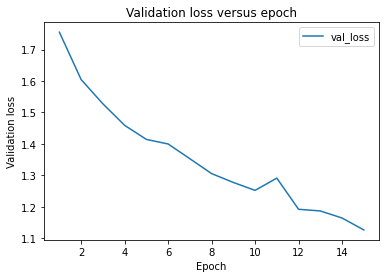

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(ep_num, val_loss, label='val_loss')
plt.title("Validation loss versus epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

plt.savefig('Validation_loss_vs_epoch')

2g: Implement code for computing overall accuracy, accuracy per class, and the confusion matrix on the test set.

In [ ]:
model = Model()
model.to(device)


model.load_state_dict(torch.load('model_14.params'))
model.eval()

size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
test_loss, correct = 0, 0

with torch.no_grad():
  for batch, (X, y) in enumerate(test_dataloader):
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
    test_loss += loss_fn(pred, y).item()
    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    # n_batches += 1

test_loss /= num_batches
correct /= size

print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
print(size)
print(num_batches)

# Your code here. Don't forget to call model.eval() first!

<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


Test Error: 
 Accuracy: 60.6%, Avg loss: 1.120895 

10000
157


In [ ]:
model.load_state_dict(torch.load('model_14.params'))
model.eval()

correct_class = list(0. for i in range(10))
total_class = list(0. for i in range(10))

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            correct_class[label] += c[i].item()
            total_class[label] += 1

for i in range(10):
    accuracy = 100 * correct_class[i] / total_class[i]
    print('Accuracy of %5s : %2d %%' % (label_names[i], accuracy))

<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


Accuracy of airplane : 66 %
Accuracy of automobile : 71 %
Accuracy of  bird : 43 %
Accuracy of   cat : 41 %
Accuracy of  deer : 46 %
Accuracy of   dog : 56 %
Accuracy of  frog : 66 %
Accuracy of horse : 69 %
Accuracy of  ship : 77 %
Accuracy of truck : 68 %


<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


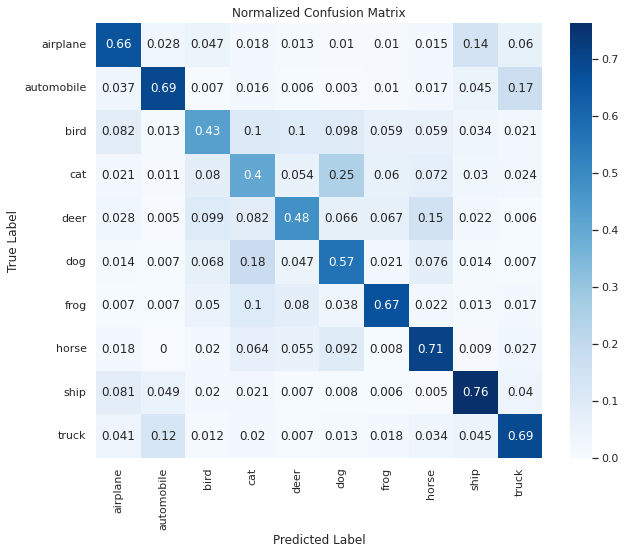

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

model = Model()
model.to(device)

model.load_state_dict(torch.load('model_14.params'))
model.eval()

all_predictions = []
all_targets = []
with torch.no_grad():
    for images, targets in test_dataloader:
        images, targets = images.to(device), targets.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

cm = confusion_matrix(all_targets, all_predictions)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(cm_normalized, annot=True, cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

<ipython-input-2-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


Cat Images:


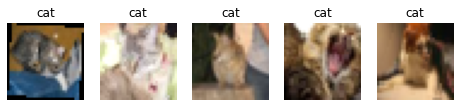

Dog Images:


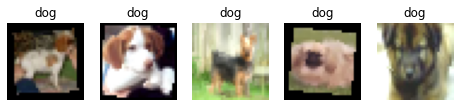

In [ ]:
num_images = 5

cat_images = []
cat_labels = []
dog_images = []
dog_labels = []

for i in range(len(test_dataloader.dataset)):
    image, label = test_dataloader.dataset[i]
    if label_names[label] == 'cat' and len(cat_images) < num_images:
        cat_images.append(np.transpose(image.numpy(), (1, 2, 0)))
        cat_labels.append(label)
    elif label_names[label] == 'dog' and len(dog_images) < num_images:
        dog_images.append(np.transpose(image.numpy(), (1, 2, 0)))
        dog_labels.append(label)
    if len(cat_images) == num_images and len(dog_images) == num_images:
        break

print("Cat Images:")
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 1
for i in range(num_images):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(cat_images[i])
    plt.title(label_names[cat_labels[i]])
    plt.axis('off')
plt.show()

# Display the dog images
print("Dog Images:")
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 1
for i in range(num_images):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(dog_images[i])
    plt.title(label_names[dog_labels[i]])
    plt.axis('off')
plt.show()

2h. Residual Blocks

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=50, kernel_size=3, stride=1, padding=1, dilation=1)
    self.conv2 = nn.Conv2d(in_channels=50, out_channels=100, kernel_size=3, stride=1, padding=1, dilation=1)
    
    self.conv3 = nn.Conv2d(in_channels=100, out_channels=100, kernel_size=3, stride=1, padding=1, dilation=1)
    self.relu = nn.ReLU()
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.linear1 = nn.Linear(in_features=1600, out_features=100)
    self.linear2 = nn.Linear(in_features=100, out_features=10)
    
  def forward(self, x):
    x = self.relu( self.conv1(x) )

    x = self.maxpool(x)

    x = self.relu( self.conv2(x) )

    x = self.maxpool(x)

    x = self.conv3(x)
    x = self.relu(x)
    x = self.conv3(x) + x
    x = self.relu(x) 

    x = self.maxpool(x)

    x = self.conv3(x)
    x = self.relu(x)
    x = self.conv3(x) + x
    x = self.relu(x)    

    x = x.reshape(x.shape[0],-1)

    x = self.relu( self.linear1(x) )
    x = self.linear2(x)
    return x 

model = Model()
model.to(device)

Model(
  (conv1): Conv2d(3, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(50, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=1600, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
batch_size = 64
learning_rate = 1e-4
epochs = 15

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
  model.train()
  for batch, (X,y) in enumerate(train_dataloader):
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      print(epoch, batch, loss.item())

  torch.save(model.state_dict(), 'model_res_%d.params' % epoch)

<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


0 0 2.3088364601135254
0 100 2.012387752532959
0 200 2.1363251209259033
0 300 2.005716323852539
0 400 1.943106770515442
0 500 1.8751698732376099
0 600 1.8517558574676514


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1 0 2.036968231201172
1 100 1.968572974205017
1 200 1.610875129699707
1 300 1.8592338562011719
1 400 1.5618890523910522
1 500 1.699078917503357
1 600 1.6900198459625244


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


2 0 1.5792008638381958
2 100 1.5987063646316528
2 200 1.822138786315918
2 300 1.7086261510849
2 400 1.528218150138855
2 500 1.620810627937317
2 600 1.6077958345413208


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


3 0 1.629134178161621
3 100 1.5769050121307373
3 200 1.5225738286972046
3 300 1.6980010271072388
3 400 1.4174530506134033
3 500 1.5859794616699219
3 600 1.341415524482727


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


4 0 1.4510798454284668
4 100 1.229101538658142
4 200 1.6647993326187134
4 300 1.4887293577194214
4 400 1.614814281463623
4 500 1.42170250415802
4 600 1.6352810859680176


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


5 0 1.3793021440505981
5 100 1.4526903629302979
5 200 1.6383394002914429
5 300 1.442632794380188
5 400 1.3913605213165283
5 500 1.4476462602615356
5 600 1.623063564300537


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


6 0 1.2728486061096191
6 100 1.606425404548645
6 200 1.5163427591323853
6 300 1.6477394104003906
6 400 1.3329819440841675
6 500 1.359460473060608
6 600 1.380755066871643


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


7 0 1.1892043352127075
7 100 1.3259258270263672
7 200 1.4401278495788574
7 300 1.2712260484695435
7 400 1.3894833326339722
7 500 1.2167997360229492
7 600 1.2968207597732544


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


8 0 1.2926307916641235
8 100 1.3216297626495361
8 200 1.3450541496276855
8 300 1.3434135913848877
8 400 1.3461476564407349
8 500 1.301916480064392
8 600 1.2960845232009888


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


9 0 1.1476716995239258
9 100 1.1597121953964233
9 200 1.158799648284912
9 300 1.3338855504989624
9 400 1.212567687034607
9 500 1.071077585220337
9 600 1.3920170068740845


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


10 0 1.494184136390686
10 100 1.3325097560882568
10 200 1.3980772495269775
10 300 1.1155171394348145
10 400 1.0682461261749268
10 500 1.1698203086853027
10 600 1.3184401988983154


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


11 0 1.370276927947998
11 100 1.096330165863037
11 200 1.171237826347351
11 300 1.1846568584442139
11 400 1.2328197956085205
11 500 1.1146374940872192
11 600 1.2336632013320923


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


12 0 1.3299791812896729
12 100 1.2952654361724854
12 200 1.1111901998519897
12 300 1.0735054016113281
12 400 1.2283445596694946
12 500 1.254352331161499
12 600 1.1120846271514893


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


13 0 1.3035354614257812
13 100 1.0763658285140991
13 200 1.1379706859588623
13 300 1.3386939764022827
13 400 1.1902503967285156
13 500 1.2038580179214478
13 600 1.106357216835022


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


14 0 1.0468950271606445
14 100 1.0855587720870972
14 200 1.2897484302520752
14 300 1.0192350149154663
14 400 0.9504275918006897
14 500 0.9511826038360596
14 600 1.234773874282837


In [ ]:
ep_num = np.arange(1,16)
val_loss = np.array([])

for epoch in range(epochs):
  model.load_state_dict(torch.load('model_res_%d.params' % epoch))
  model.eval()

  loss = 0
  n_batches = 0 
  for batch, (X, y) in enumerate(val_dataloader):
    X = X.to(device)
    y = y.to(device)
    
    pred = model(X)
    loss += loss_fn(pred, y).item()
    n_batches += 1

  print(loss/n_batches)

  val_loss = np.append(val_loss, loss/n_batches)

<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.8249800197637764


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.6770327387342028


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.5825194454496834


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.4895412694117067


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.4468331838109691


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.4158716171410433


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.3513345232435092


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.3229840189028697


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.2972955559469332


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.3222924953053712


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.2595235454808376


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.216078210788168


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.2501699465095617


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.1942119970443144


<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


1.193819042603681


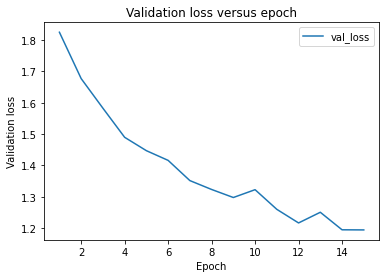

In [ ]:
plt.plot(ep_num, val_loss, label='val_loss')
plt.title("Validation loss versus epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.legend()
plt.show()

In [ ]:
model.load_state_dict(torch.load('model_res_14.params'))
model.eval()

size = len(test_dataloader.dataset)
num_batches = len(test_dataloader)
test_loss, correct = 0, 0

with torch.no_grad():
  for batch, (X, y) in enumerate(test_dataloader):
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
    test_loss += loss_fn(pred, y).item()
    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    # n_batches += 1

test_loss /= num_batches
correct /= size

print(f"Test Error: \n Overall Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

<ipython-input-213-9857586ae6a4>:24: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  label = torch.tensor(label, dtype=torch.long)


Test Error: 
 Overall Accuracy: 58.4%, Avg loss: 1.177513 

